Attempting to load graph from: graphsage/graph_schema.json
Saving ID mapping files...


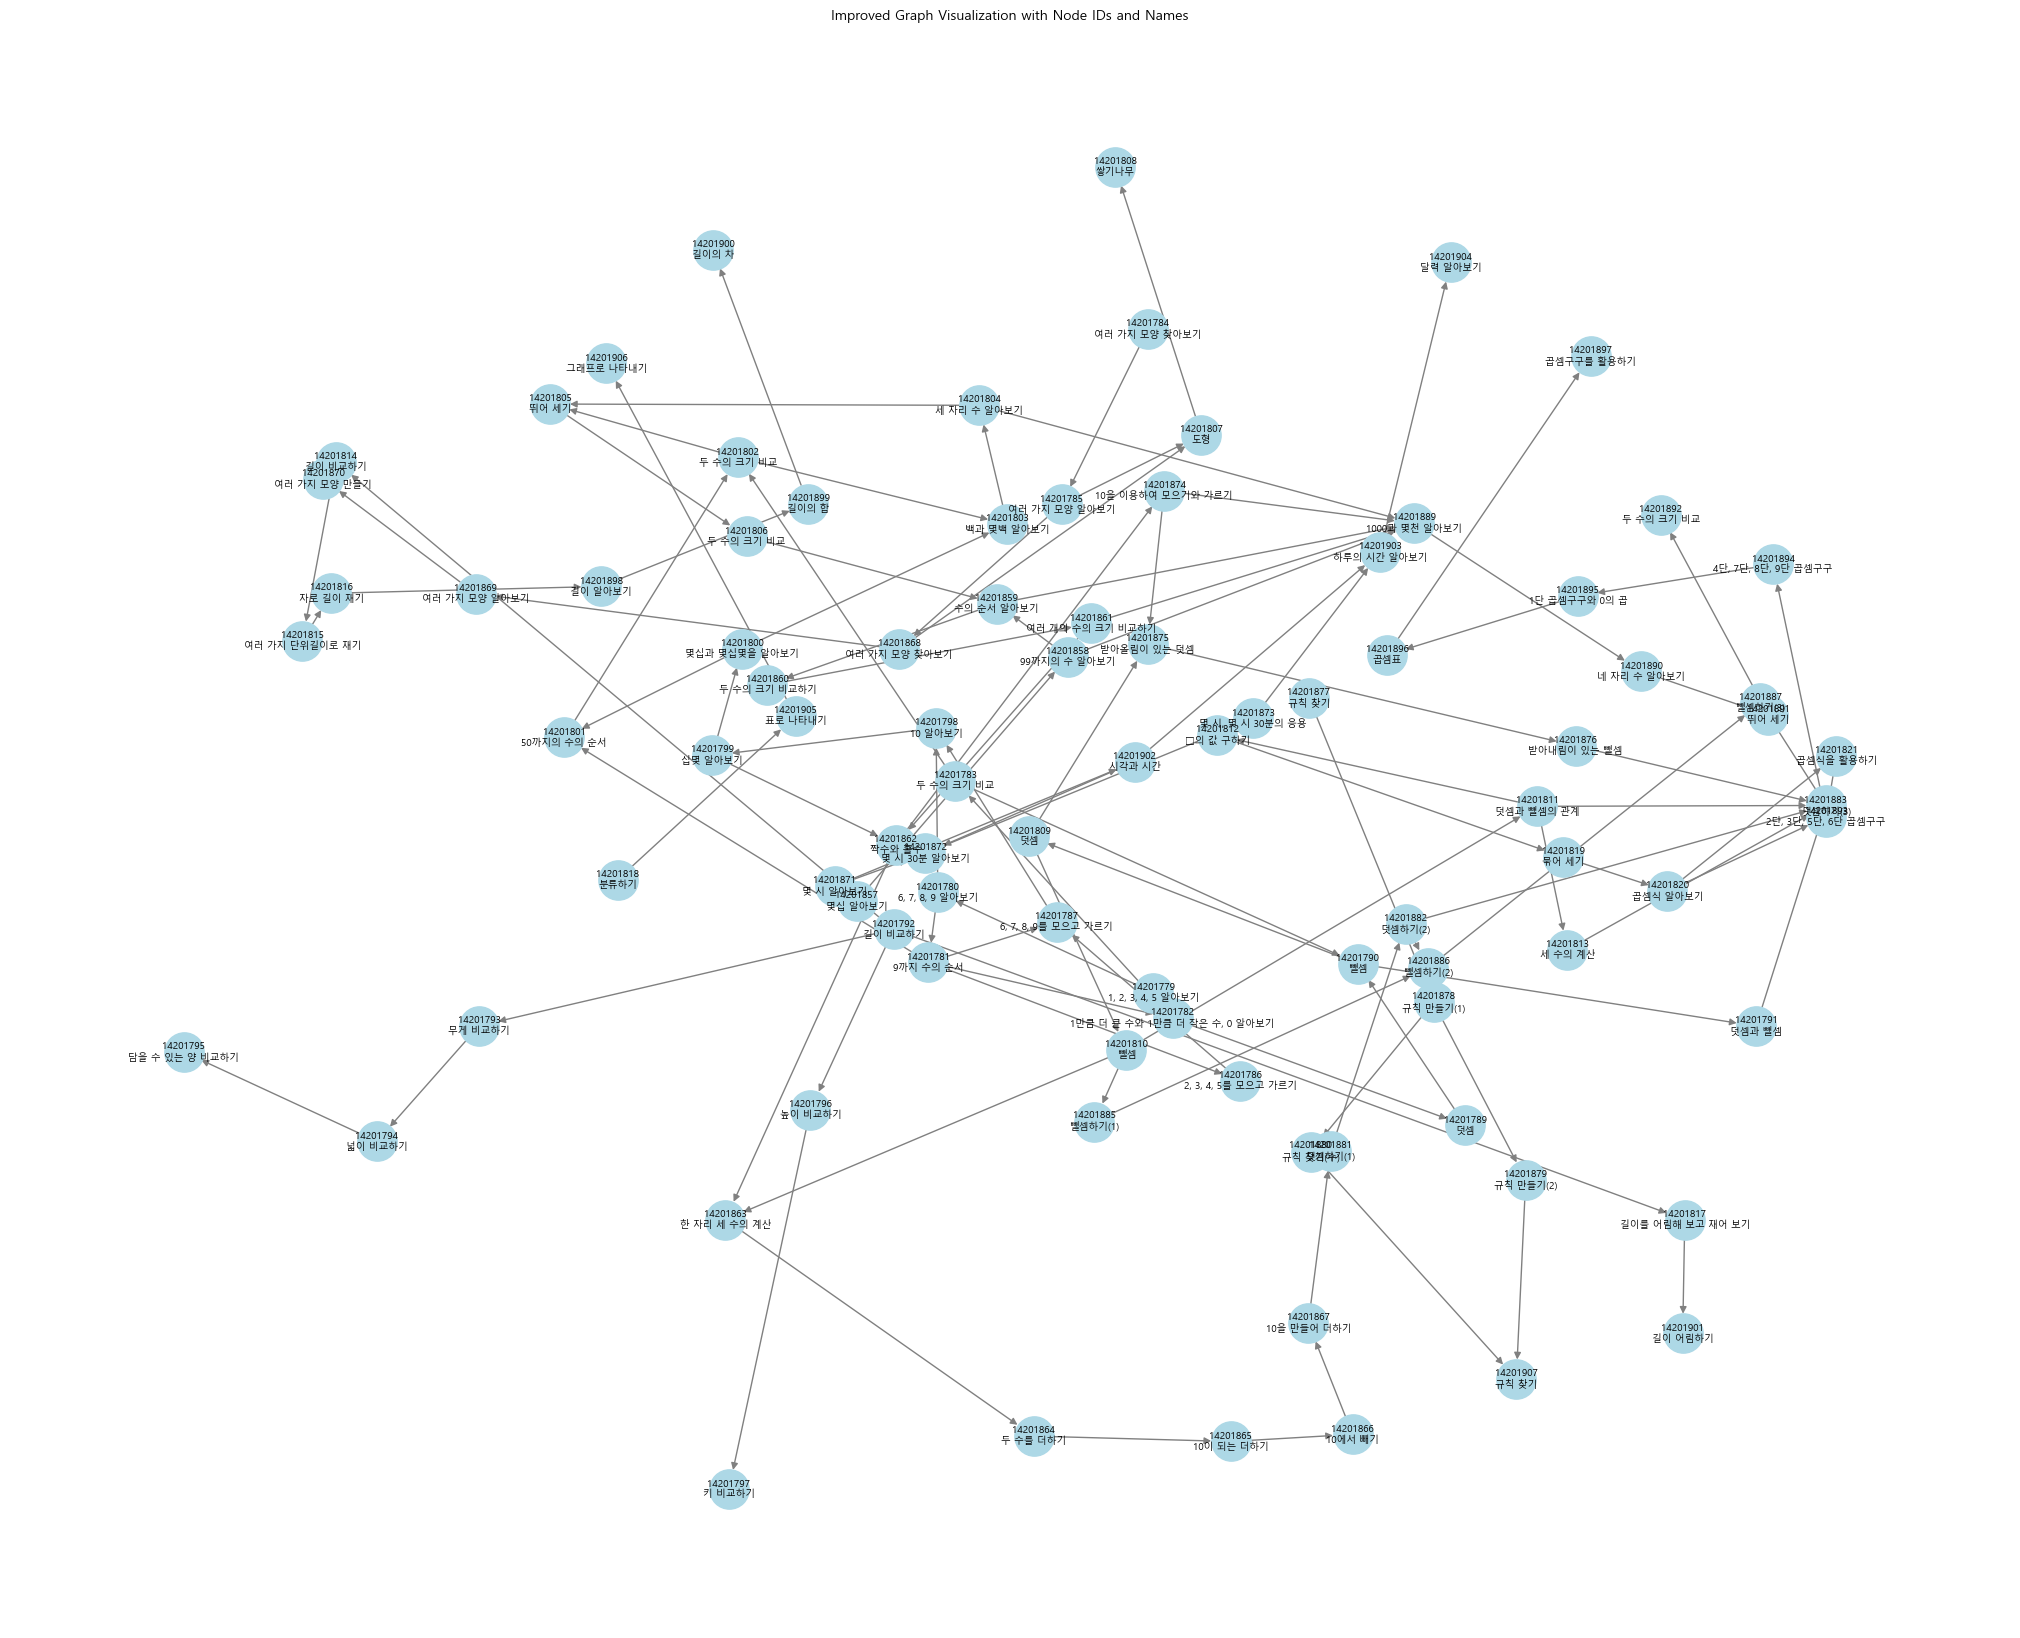

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from graphsage.data_loader import load_graph

# 한글 폰트 설정
from matplotlib import font_manager as fm
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows에서 'Malgun Gothic' 경로
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # Linux/Mac에서 'Nanum Gothic' 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 그래프 로드
g = load_graph("graphsage/graph_schema.json")

# ID 매핑 정보 로드
with open("id_to_idx.json", "r") as f:
    id_to_idx = json.load(f)

# idx_to_id로 변환
idx_to_id = {v: k for k, v in id_to_idx.items()}

# lecture_df.csv 로드
lecture_df = pd.read_csv("fastapi_app/data/lecture_df.csv")

# f_mchapter_id를 기준으로 f_mchapter_nm 매핑 생성
id_to_name = lecture_df.set_index("f_mchapter_id")["f_mchapter_nm"].to_dict()

# DGL 그래프를 NetworkX로 변환
nx_g = g.to_networkx()

# 노드 라벨 설정 (ID와 f_mchapter_nm을 함께 표시)
node_labels = {}
for i in range(g.num_nodes()):
    original_id = idx_to_id[i]  # id_to_idx에서 원래 ID 가져오기
    chapter_name = id_to_name.get(int(original_id), "Unknown")  # f_mchapter_nm 가져오기
    node_labels[i] = f"{original_id}\n{chapter_name}"  # ID와 이름 병합

# 그래프 시각화
plt.figure(figsize=(20, 16))  # 그래프 크기 확장

# 더 나은 배치를 위해 spring_layout 사용, 간격 조정
pos = nx.spring_layout(nx_g, k=0.3, iterations=50)  # k 값으로 간격 조정
nx.draw(nx_g, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=800)

# 라벨 추가
nx.draw_networkx_labels(nx_g, pos, labels=node_labels, font_size=7, font_color='black', font_family=font_prop.get_name())

plt.title("Improved Graph Visualization with Node IDs and Names", fontproperties=font_prop)
plt.show()


In [17]:
import json
import pandas as pd

# 기존 JSON 파일 로드
with open("graphsage/graph_schema.json", "r") as f:
    graph_schema = json.load(f)

# lecture_df.csv 로드
lecture_df = pd.read_csv("fastapi_app/data/lecture_df.csv")

# f_mchapter_id를 기준으로 f_mchapter_nm 매핑 생성
id_to_name = lecture_df.set_index("f_mchapter_id")["f_mchapter_nm"].to_dict()

# 노드 정보에 f_mchapter_nm 추가
for node in graph_schema["nodes"]:
    node_id = int(node["id"])  # JSON의 id를 정수로 변환
    node["f_mchapter_nm"] = id_to_name.get(node_id, "Unknown")  # 매핑된 이름 추가

# 수정된 JSON 파일 저장
with open("updated_graph_schema.json", "w", encoding="utf-8") as f:
    json.dump(graph_schema, f, ensure_ascii=False, indent=4)

print("노드 정보에 f_mchapter_nm 값이 추가된 JSON 파일이 저장되었습니다.")


노드 정보에 f_mchapter_nm 값이 추가된 JSON 파일이 저장되었습니다.
